Michael Higgins, Sierra Wilde

# $$\text{Lab 4: Working With 'real' Data}$$

## Problem 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
#this sets the size of the plot to something useful
#plt.rcParams["figure.figsize"] = (20,15)

## 1).

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [119]:
data = np.array(hf.get('data'))

Here I am making a Pandas DataFrame and labeling all the data so I can access it more easily for the rest of this problem. From initial inspection we can see counts tend to be between 5-10 and that each data point is 100 milliseconds after the last. Also that the solar phase and longitude go from 0 to 360 degrees.

In [5]:
data_table = pd.DataFrame(data).T
data_table.columns = ['Time (gps)','Solar Phase(deg)','Earth Longitude(deg)','Particle Counts']
data_table

,Time (gps),Solar Phase(deg),Earth Longitude(deg),Particle Counts
0,940680016.0,315.000000,45.000000,10.0
1,940680016.1,315.007112,45.006667,8.0
2,940680016.2,315.014225,45.013333,7.0
3,940680016.3,315.021337,45.020000,11.0
4,940680016.4,315.028449,45.026667,8.0
5,940680016.5,315.035561,45.033333,11.0
6,940680016.6,315.042674,45.040000,5.0
7,940680016.7,315.049786,45.046667,10.0
8,940680016.8,315.056898,45.053333,9.0
9,940680016.9,315.064011,45.060000,8.0


In [18]:
k1 = np.arange(data_table['Particle Counts'].min(),data_table['Particle Counts'].max())
total_mean = data_table['Particle Counts'].mean()
pmf1 = stats.poisson.pmf(k1,total_mean)


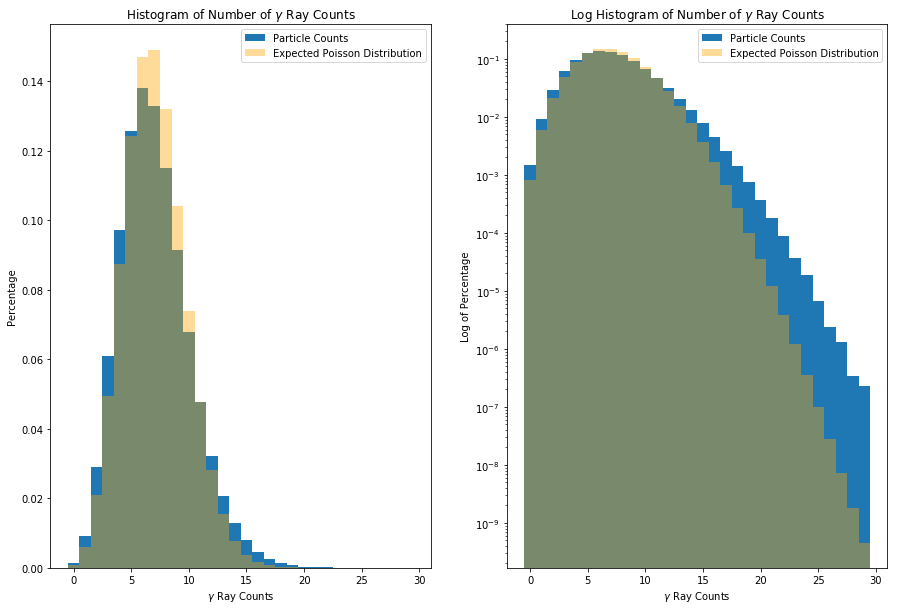

In [24]:
fig,ax = plt.subplots(1,2,figsize=(15,10))

ax[0].hist(data_table['Particle Counts'], bins = np.arange(0,data_table['Particle Counts'].max()+1),align='left',density=True)
ax[0].set_title(r'Histogram of Number of $\gamma$ Ray Counts')
ax[0].set_xlabel(r'$\gamma$ Ray Counts')
ax[0].set_ylabel(r'Percentage');
ax[0].bar(k1,pmf1,color='orange',width=1,alpha=.4,label = "Expected Poisson Distribution")
ax[0].legend()


ax[1].hist(data_table['Particle Counts'], bins = np.arange(0,data_table['Particle Counts'].max()+1),align='left',density=True)
ax[1].set_title(r'Log Histogram of Number of $\gamma$ Ray Counts')
ax[1].set_xlabel(r'$\gamma$ Ray Counts')
ax[1].set_ylabel(r'Log of Percentage');
ax[1].bar(k1,pmf1,color='orange',width=1,alpha=.4,label = "Expected Poisson Distribution")
ax[1].legend()
ax[1].set_yscale('log');


Above is a plot that shows that if we assumed a poisson distribution with the same mean as our data we do not get an accurate discribtion of our data. The possion distribution is $\mathrm{PMF} = \frac{e^{-\mu}\mu^k}{k!}$. This means that there is some form of contamination in our data if we are assuming the poisson distribution. Specifically we would expect to see lower percentages of the high $\gamma$ ray counts than actual data shows suggesting that our background may vary with time in such a way that it can be estimated as poisson around a different mean at different times. We need to find how the mean of the data changes over time in 100 second intervals and then use that mean in our poisson distribution at any time within those 100 seconds to get a accurate poisson background that depends on time.

## 2).

In [7]:
pcavg100sec = []
for i in np.arange(0,(len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Particle Counts'])[int(1000*i):int(1000*(i+1))].sum()/1000
    pcavg100sec.extend([p])


In [8]:
spavg100sec = []
for i in np.arange(0,(len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Solar Phase(deg)'])[int(1000*i):int(1000*(i+1))].sum()/1000
    spavg100sec.extend([p])

In [9]:
elavg100sec = []
for i in np.arange(0,(len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Earth Longitude(deg)'])[int(1000*i):int(1000*(i+1))].sum()/1000
    elavg100sec.extend([p])

(0, 864)

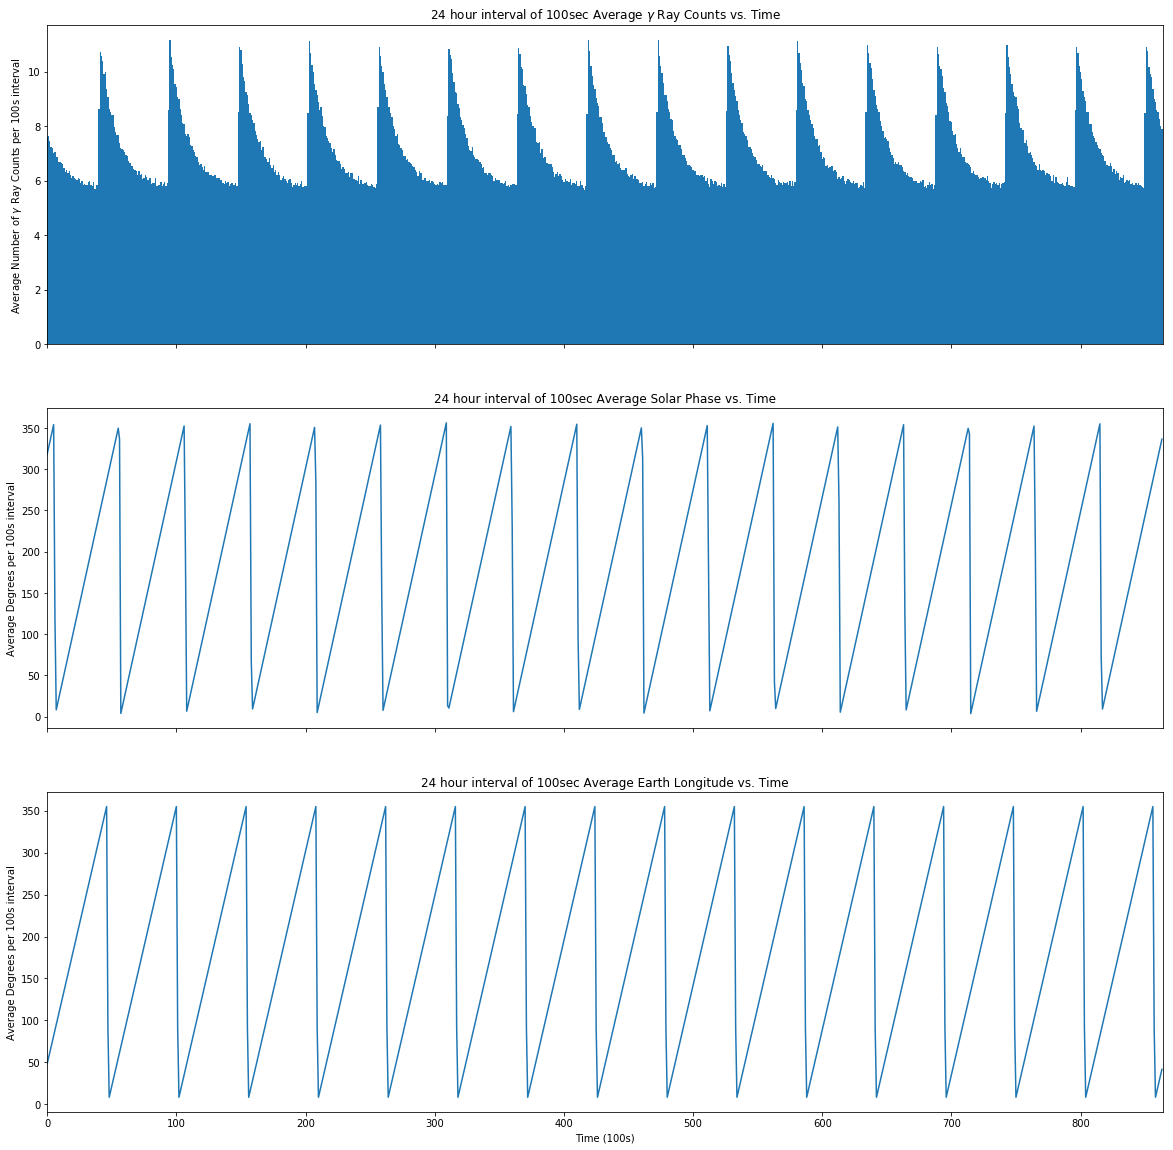

In [10]:
fig,ax = plt.subplots(3,1,figsize=(20,20),sharex=True)

ax[0].set_title(r'24 hour interval of 100sec Average $\gamma$ Ray Counts vs. Time')
ax[0].set_ylabel(r'Average Number of $\gamma$ Ray Counts per 100s interval')
ax[0].bar(np.arange(0,25920)[0:864],np.array(pcavg100sec)[0:864],width=1);

ax[1].set_title(r'24 hour interval of 100sec Average Solar Phase vs. Time')
ax[1].set_ylabel(r'Average Degrees per 100s interval')
ax[1].plot(np.arange(0,25920)[0:864],np.array(spavg100sec)[0:864]);#,width=1);

ax[2].set_title(r'24 hour interval of 100sec Average Earth Longitude vs. Time')
ax[2].set_ylabel(r'Average Degrees per 100s interval')
ax[2].plot(np.arange(0,25920)[0:864],np.array(elavg100sec)[0:864]);#,width=1);
ax[2].set_xlabel('Time (100s)');
ax[2].set_xlim(0,864)

The above plots serve two purposes. The first purpose is that we can see in the first plot what the 100 second interval average counts as a function of time looks like for a single 24-hour day (there are about 30 days worth of data, but it takes away from the features to plot all of the days so we chose to just show one for the sake of clarity and resolution). The other plots of the solar phase and longitude offer a way for us to try and physically determine what is happening with our data. I will attempt to propose a model later in this problem using these plots. One last thing to note is that it appears that the peaks occur about every 5400 seconds which is exactly 90 mins(the time it takes to orbit the Earth).

## 3).

In [11]:
Maxc = np.asarray(pcavg100sec)[40:50].max()
Maxt = np.where(np.asarray(pcavg100sec)[0:100] == Maxc)
Minc = np.asarray(pcavg100sec)[41:100].min()
Mint = np.where(np.asarray(pcavg100sec)[0:100] == Minc)

Maxc,Maxt[0][0],Minc,Mint[0][0]

(10.736, 41, 5.828, 89)

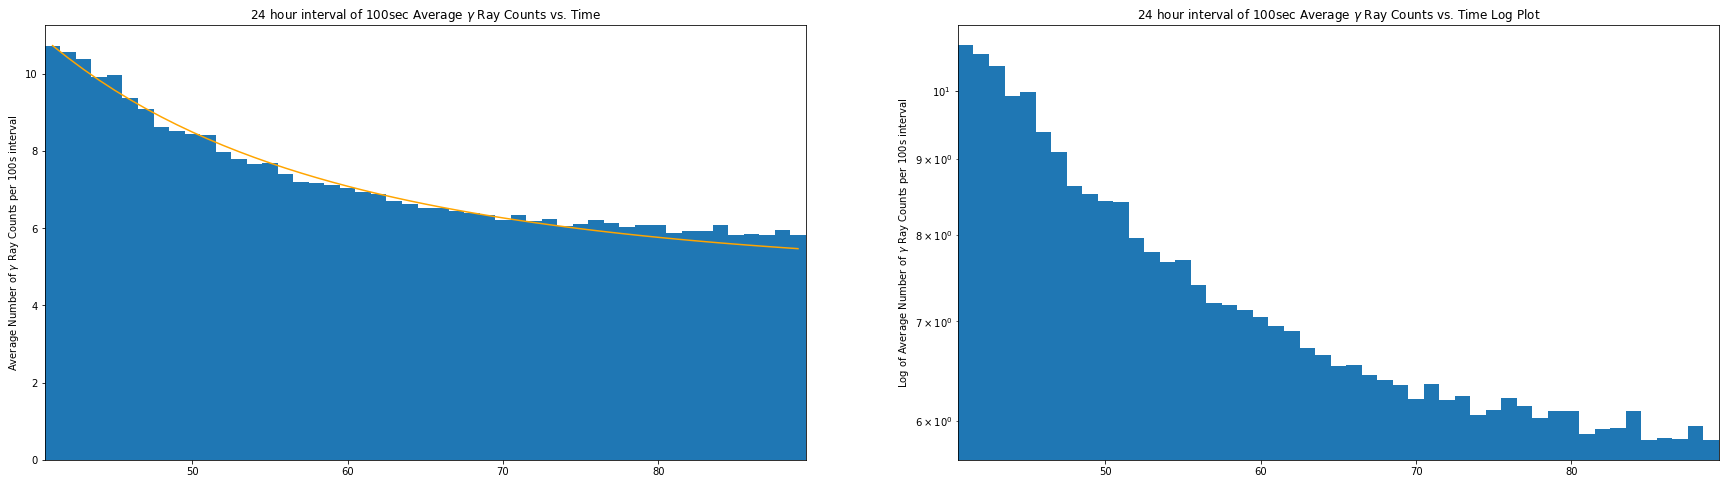

In [12]:
fig,ax = plt.subplots(1,2,figsize=(30,8))

ax[0].set_title(r'24 hour interval of 100sec Average $\gamma$ Ray Counts vs. Time')
ax[0].set_ylabel(r'Average Number of $\gamma$ Ray Counts per 100s interval')
ax[0].bar(np.arange(0,25920)[41:90],np.array(pcavg100sec)[41:90],width=1);
ax[0].set_xlim(40.5,89.5)

ax[1].set_title(r'24 hour interval of 100sec Average $\gamma$ Ray Counts vs. Time Log Plot')
ax[1].set_ylabel(r'Log of Average Number of $\gamma$ Ray Counts per 100s interval')
ax[1].bar(np.arange(0,25920)[41:90],np.array(pcavg100sec)[41:90],width=1);
ax[1].set_xlim(40.5,89.5)
ax[1].set_yscale('log')
ax[0].plot(np.arange(0,25920)[41:90],Maxc*np.exp((-1+np.exp(-(np.arange(0,25920)[41:90]-41)/26))*.8),c='orange');

Above was my attempt to fit a background to our data for a 90 minute period. Upon inspection of the log plot it appeared that our average mean for our poisson distribution was of the form $\mu_{max} e^{(e^{-t\alpha}-1)\beta}$. This is a rather odd distribution and it is continuous so it would serve no good for us. This is more of an interesting exploration of the data. The final solution I came to is below. 

To create a model for my background I am going to make a list of the means of every 100 second interval and assume that each .1 second in those 100 second snippets should assume a poisson distribution with an average equal to the average counts of the 100 seconds. (All of this will be normalized). I will do a chi-squared test for all of the data points to get how close my pmf fits the actual data.

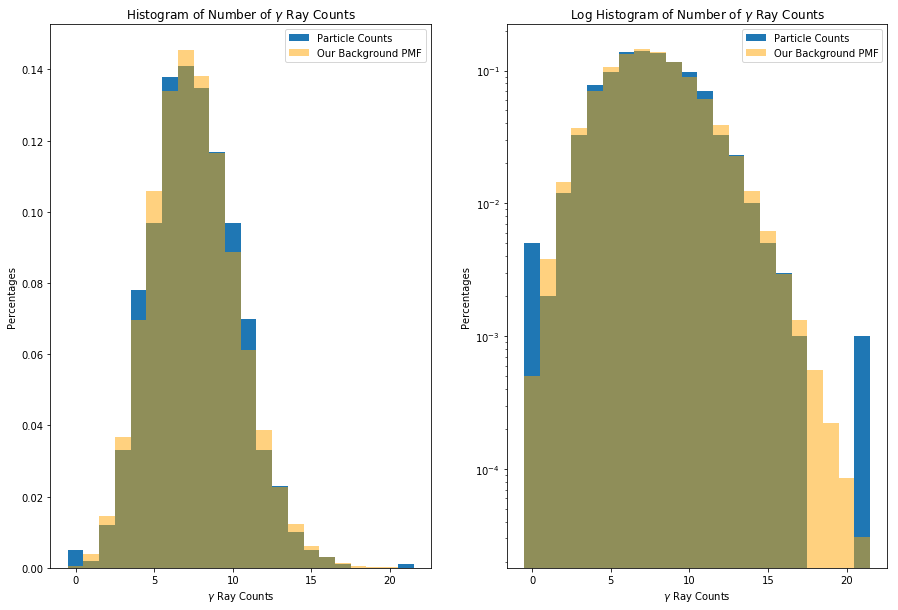

In [107]:
fig,ax = plt.subplots(1,2,figsize=(15,10))

k = np.arange(data_table['Particle Counts'][0:1001].min(),data_table['Particle Counts'][0:1001].max())
pmf = stats.poisson.pmf(k,data_table['Particle Counts'][0:1001].mean())

ax[0].hist(data_table['Particle Counts'][0:1001], bins = np.arange(0,data_table['Particle Counts'][0:1001].max()+1),align='left',density=True)
ax[0].set_title(r'Histogram of Number of $\gamma$ Ray Counts')
ax[0].set_xlabel(r'$\gamma$ Ray Counts')
ax[0].set_ylabel(r'Percentages');
ax[0].bar(k,pmf,color='orange',width=1,alpha=.5,label="Our Background PMF")
ax[0].legend()


ax[1].hist(data_table['Particle Counts'][0:1001], bins = np.arange(0,data_table['Particle Counts'][0:1001].max()+1),align='left',density=True)
ax[1].set_title(r'Log Histogram of Number of $\gamma$ Ray Counts')
ax[1].set_xlabel(r'$\gamma$ Ray Counts')
ax[1].set_ylabel(r'Percentages');
ax[1].set_yscale('log')


ax[1].bar(k,pmf,color='orange',width=1,alpha=.5,label="Our Background PMF")

ax[1].set_title(r'Log Histogram of Number of $\gamma$ Ray Counts')
ax[1].set_xlabel(r'$\gamma$ Ray Counts')
ax[1].set_ylabel(r'Percentages');
ax[1].set_yscale('log')
ax[1].legend()


Above is looking at the first 100 seconds of our data and we can see that in concept it will work so now I will determine how well this pmf fits all of our data using Chi-squared test. $$\chi \mathrm{statistic} = \sum\left( \frac{(Observed - Expected)^2}{Expected} \right)$$

$H_0$: My null hypothesis is that my background pmf will be an accurate description of my observed distribution.

$H_a$: My alternative hypothesis is that my background pmf does not accurately describe my observed distribution.

In [47]:

    
ppmffinal = np.arange(data_table['Particle Counts'].min(),np.asarray(data_table['Particle Counts']).max()+1)*0   
for i in np.arange(0,(len(data_table['Time (gps)'])-1)/1000):
    k = np.arange(np.asarray(data_table['Particle Counts']).min(),np.asarray(data_table['Particle Counts']).max()+1)
    ppmf = stats.poisson.pmf(k,data_table['Particle Counts'][int(1000*i):int(1000*(i+1))].mean())*1000
    ppmffinal = ppmffinal+ppmf

#this code takes a long time to run, but essentially it makes a pmf for every 100 seconds of data and shows
#the expected number of occurances in that 100 second range based on a poisson pmf with a mean equal to the mean of that 100s interval

In [68]:
observed =np.histogram(np.asarray(data_table['Particle Counts']),bins = np.arange(0,32))

In [51]:
ppmffinal

array([3.81879526e+04, 2.37125480e+05, 7.42138862e+05, 1.56373116e+06,
       2.50116679e+06, 3.24846525e+06, 3.58083029e+06, 3.45964359e+06,
       3.00395645e+06, 2.39196314e+06, 1.77560006e+06, 1.24475051e+06,
       8.31962339e+05, 5.33518616e+05, 3.29432198e+05, 1.96161468e+05,
       1.12669710e+05, 6.24031236e+04, 3.33133359e+04, 1.71359677e+04,
       8.49273732e+03, 4.05614013e+03, 1.86756002e+03, 8.29418408e+02,
       3.55550618e+02, 1.47225010e+02, 5.89327659e+01, 2.28233194e+01,
       8.55856794e+00, 3.11009928e+00, 1.09608058e+00])

In [89]:
chi = stats.chisquare(observed[0]/observed[0].sum(),ppmffinal/ppmffinal.sum())
chi

Power_divergenceResult(statistic=0.00012792224452308788, pvalue=1.0)

The $\chi^2$ test above yields a pvalue =1 so I don't reject my null hypothesis. This means that my method to find a time dependent background distribution for my data was successful and representative of my observed distribution.

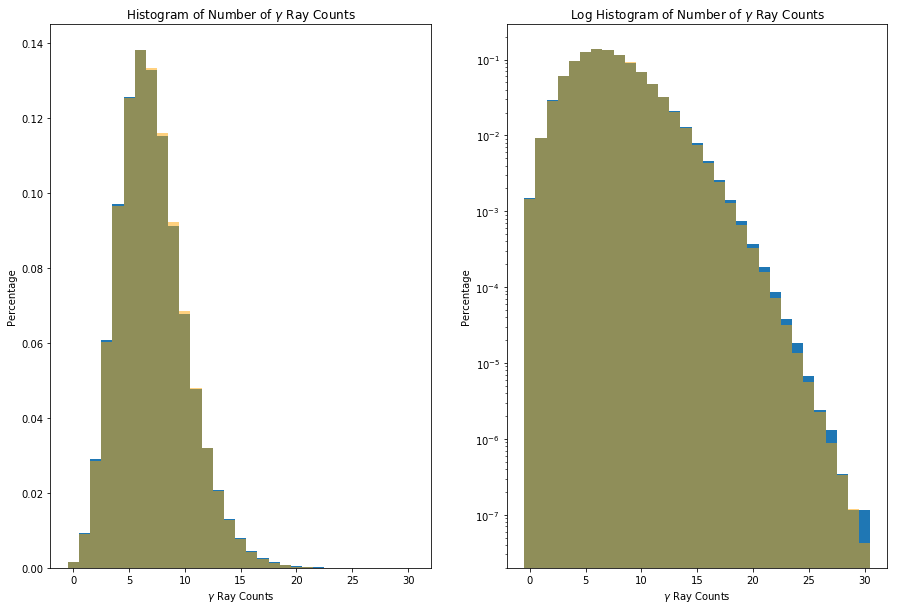

In [106]:
fig,ax = plt.subplots(1,2,figsize=(15,10))

ax[0].set_title(r'Histogram of Number of $\gamma$ Ray Counts')
ax[0].set_xlabel(r'$\gamma$ Ray Counts')
ax[0].set_ylabel(r'Percentage');
ax[0].bar(np.arange(0,31),observed[0]/observed[0].sum(),width=1,label ="Observed Data")
ax[0].bar(np.arange(0,31),ppmffinal/ppmffinal.sum(),alpha=0.5,color = 'orange',width=1, label = "My Background PMF")

ax[1].set_title(r'Log Histogram of Number of $\gamma$ Ray Counts')
ax[1].set_xlabel(r'$\gamma$ Ray Counts')
ax[1].set_ylabel(r'Percentage');
ax[1].bar(np.arange(0,31),observed[0]/observed[0].sum(),width=1,label ="Observed Data")
ax[1].bar(np.arange(0,31),ppmffinal/ppmffinal.sum(),alpha=0.5,color='orange',width=1, label = "My Background PMF")

ax[1].set_yscale('log')

Above is a plot that showcases what the chi-squared test confirmed. My time dependent background pmf in yellow matches my actual data extremely well. This is the same plot as my first plot in this lab, except my first pmf did not assume a time dependent background pmf while this one does.

## 4).

In [110]:
sigma5probability = stats.norm.sf(5)

In [115]:
sigma5counts = []

for i,value in enumerate([0,10,20,30,40,50,60,70,80,90]):
    k = np.arange(np.asarray(data_table['Particle Counts']).min(),np.asarray(data_table['Particle Counts']).max()+1)
    ppmf = stats.poisson.isf(sigma5probability,data_table['Particle Counts'][int(1000*value):int(1000*(value+1))].mean())
    sigma5counts.extend([ppmf])

In [117]:
sigma5counts


[25.0, 23.0, 22.0, 21.0, 27.0, 26.0, 24.0, 22.0, 22.0, 21.0]

In [127]:
prob_table = pd.DataFrame({'Time(seconds from the beginning of the data)':np.array([0,10,20,30,40,50,60,70,80,90])*100,r'5$\sigma$ Discovery Sensitivity Threshold(Counts)':np.asarray(sigma5counts)},index=None)

In [129]:
prob_table

,Time(seconds from the beginning of the data),5$\sigma$ Discovery Sensitivity Threshold(Counts)
0,0,25.0
1,1000,23.0
2,2000,22.0
3,3000,21.0
4,4000,27.0
5,5000,26.0
6,6000,24.0
7,7000,22.0
8,8000,22.0
9,9000,21.0


In the tabel above I have a list of different times in seconds where 0 corresponds to the first time the data starts at. The discovery threshold goes from high to low in a cyclic fashion. This behavior makes sense looking at the previous plot of counts vs. time that I did. It appears that there is about 5000 seconds from peak to peak, this happens to be the time it takes the satellite to make one full orbit around the Earth. This, along with the graphs of solar phase and longitude, provide for a theory that these dips in gamma ray counts are caused by the the combination of the Earth and Sun periodically shielding the satellite from gamma rays.

## Problem 2:

## 1).

I downloaded the data, but I had to switch the axes for the image stack since they weren't in the correct dimensions for python.

In [130]:
hfimages = h5py.File('images.h5', 'r')

In [472]:
image1 = np.array(hfimages.get('image1'))
imagestack = np.array(hfimages.get('imagestack'))
imagestack = np.swapaxes(imagestack,0,2)

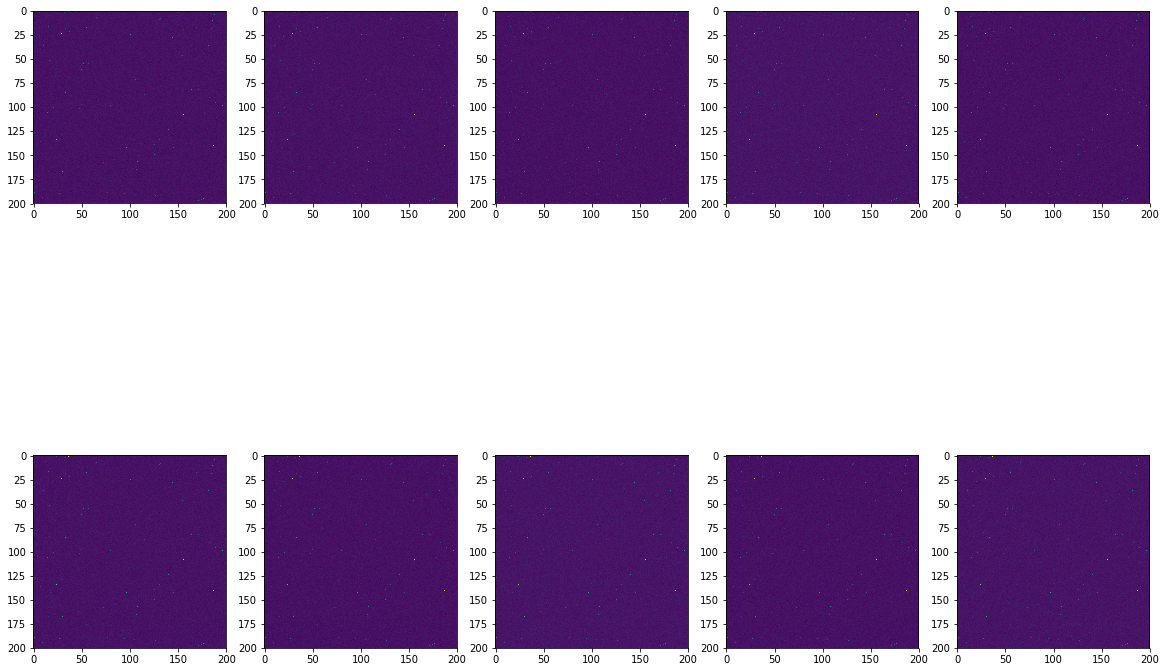

In [417]:
fig,ax = plt.subplots(2,5)
for j in np.arange(0,2):
    for i in np.arange(0,5):
        ax[j][i].imshow(imagestack[i+j])

## 2).

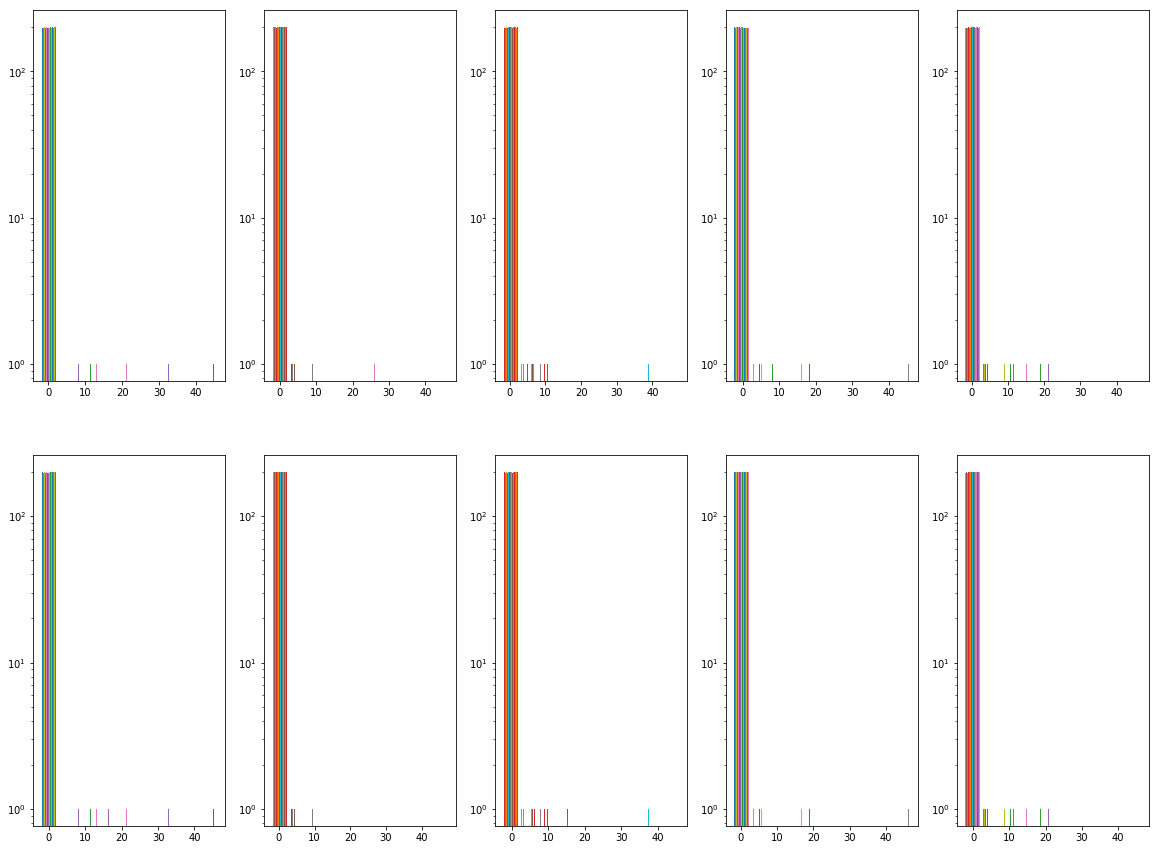

In [200]:
fig,ax = plt.subplots(2,5)
for j in np.arange(0,2):
    for i in np.arange(0,5):
        ax[j][i].hist(imagestack[i+j])
        ax[j][i].set_yscale('log')

Above are plots of all the histograms. We can see clear outliers.

In [197]:
imagestack[0][2]

array([ 0.77349547, -1.22944512, -0.03294592, -0.87706616, -0.46101484,
        0.41609706,  0.61107139, -0.15595075,  0.06097619, -0.7816882 ,
        0.59913794, -0.16674419, -0.4742519 ,  0.4781283 ,  0.44116649,
       -0.14585287,  0.2035581 , -0.54530907, -0.29015548,  1.10861843,
       -0.5699068 ,  0.1191637 , -0.28222583,  0.17616559,  0.82736176,
        0.24779331,  0.7081423 , -0.53482552,  0.25444978, -0.2872698 ,
       -0.58293283, -1.26585052,  7.11370032,  0.8484667 ,  1.01163421,
       -0.68000014, -0.54512423, -0.35221159,  1.05886851,  0.52686468,
       -1.53676753, -0.98891463, -0.19296059, -0.02586631,  0.3559801 ,
        0.82691163,  0.76061062, -0.26183195, -0.5867343 , -0.56265686,
        0.5730021 , -0.31474893,  0.9409904 , -0.51172904,  0.02141194,
       -0.13400145,  0.11293198, -0.04403606,  0.17163169,  0.1769571 ,
        0.27185018, -0.02673414,  0.09509374,  0.29128829,  0.23575518,
        0.24514509,  0.2191146 , -0.38868254,  0.17907415,  0.80

Looking at a histogram for the values of all the points it becomes clear that there are some outliers in our data. The data on the far right side appears to be bright spots or stars in this case. In order to make a background pdf I will have to take the points where the images have a flux <4 so I can get a background for the parts of the image that are without the bright stars. The images appear to be spatially consistent and we would expect this since the background of the sky should be flat. We would also expect our background to be constant with time since random bright events should correspond to a signal not the background.

In [456]:
avg = (imagestack[0]+imagestack[1]+imagestack[2]+imagestack[3]+imagestack[4]+imagestack[5]+imagestack[6]+imagestack[7]+imagestack[8]+imagestack[9])/10

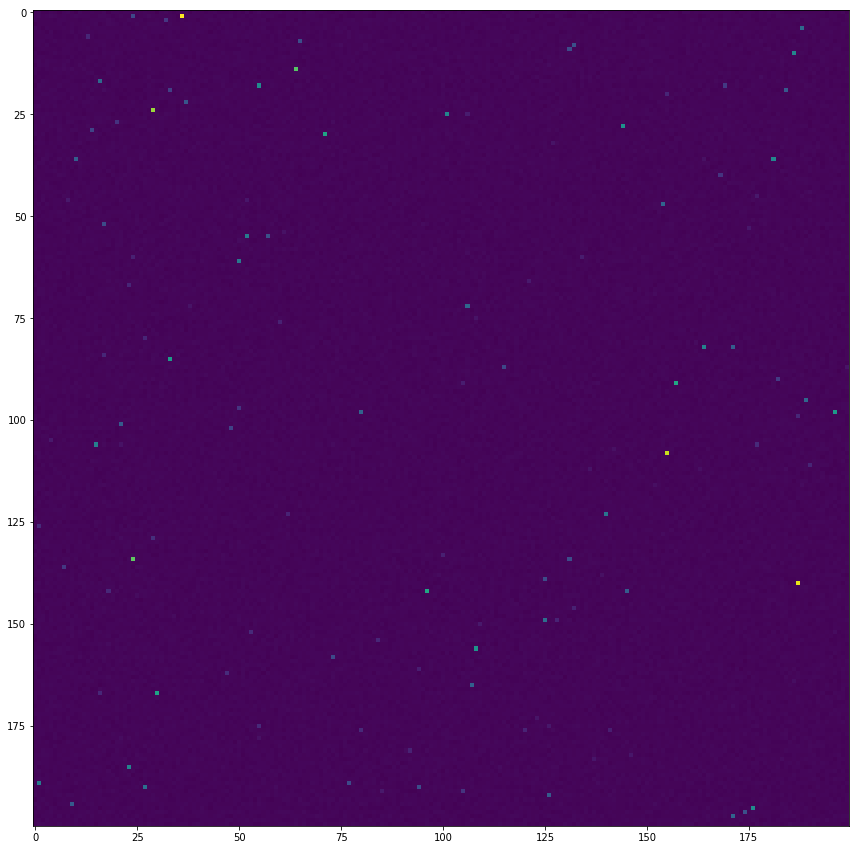

In [284]:
plt.imshow(avg)

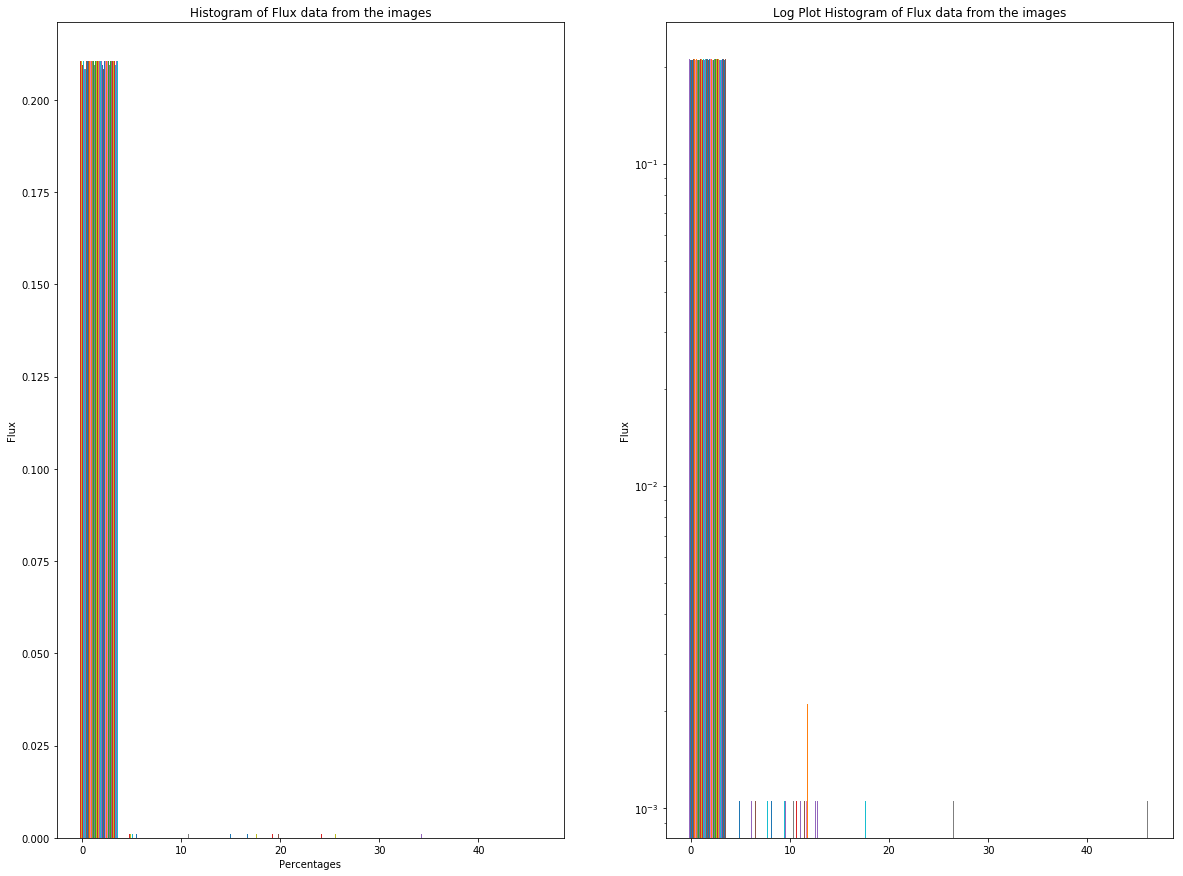

In [253]:
fig,ax = plt.subplots(1,2)

ax[0].hist(avg,density=True)
ax[0].set_title('Histogram of Flux data from the images')
ax[0].set_xlabel('Percentages')
ax[0].set_ylabel('Flux')

ax[1].set_title('Log Plot Histogram of Flux data from the images')
ax[1].hist(avg,density=True)
ax[1].set_ylabel('Flux')
ax[1].set_yscale('log');

Looking at these plots of the averages of the images in a histogram form we can see that there are some clear outliers in our data. To fix this I will do something called sigma clipping where I calculate the mean and std. deviation of this distribution and remove any points that are greater than $\mu + 5\sigma$. I will iterate this a few times until I can see the outliers are removed and we are left with our distribution

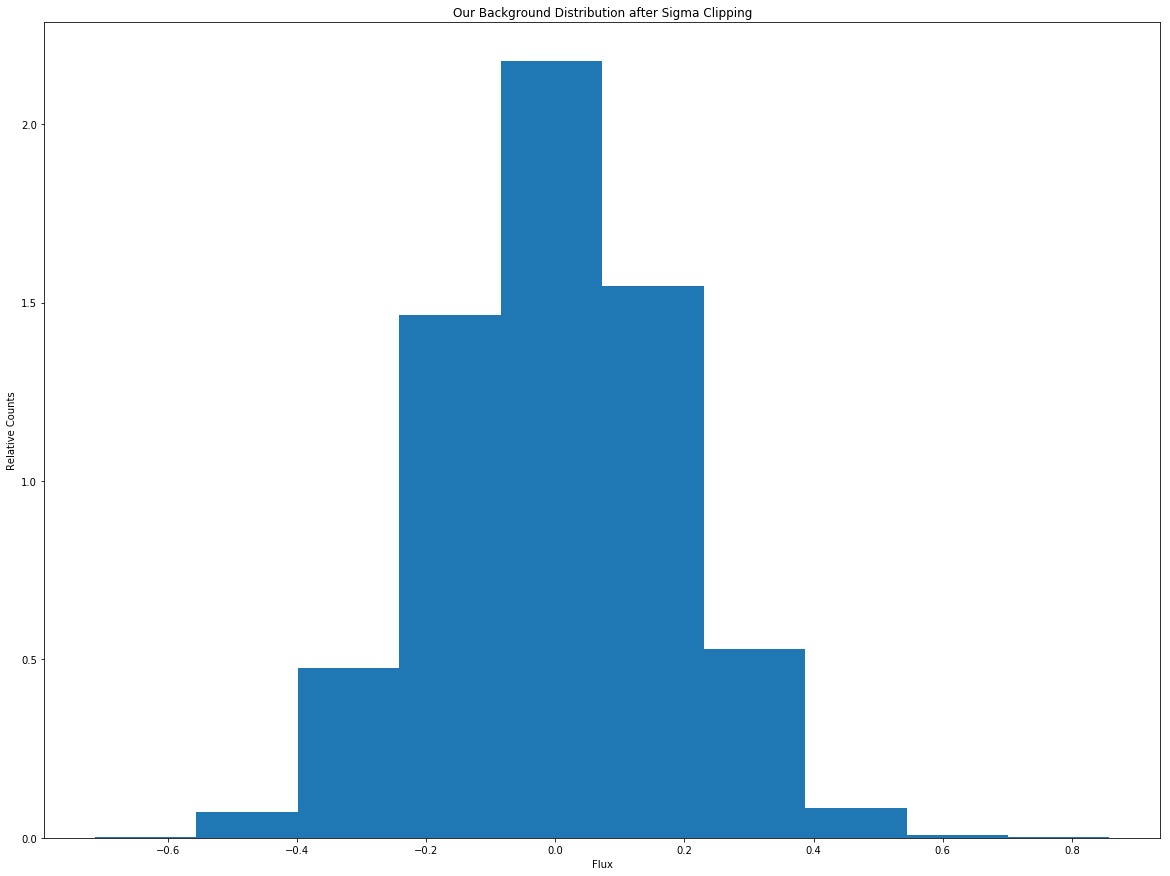

In [310]:
avgnew = avg
for i in range(6):
    avgnew = np.delete(avgnew,np.where(avgnew>= avgnew.mean()+5*avgnew.std()))
    avgnew = np.delete(avgnew,np.where(avgnew<= avgnew.mean()-5*avgnew.std()))
plt.hist(avgnew,density=True)
plt.title('Our Background Distribution after Sigma Clipping')
plt.ylabel('Relative Counts')
plt.xlabel('Flux');
    

In [311]:
len(avgnew)

39764

We can see that sigma clipping only removed about 300pixels but our distribution makes a lot more sense if we were considering a background caused my photon interactions with a CCD.

In [312]:
fit = stats.norm.fit(avgnew)
fit

(-7.893204900644334e-05, 0.17774042954226058)

This gives me a normal curve pdf fit. I will now plot it and see how well it matches.


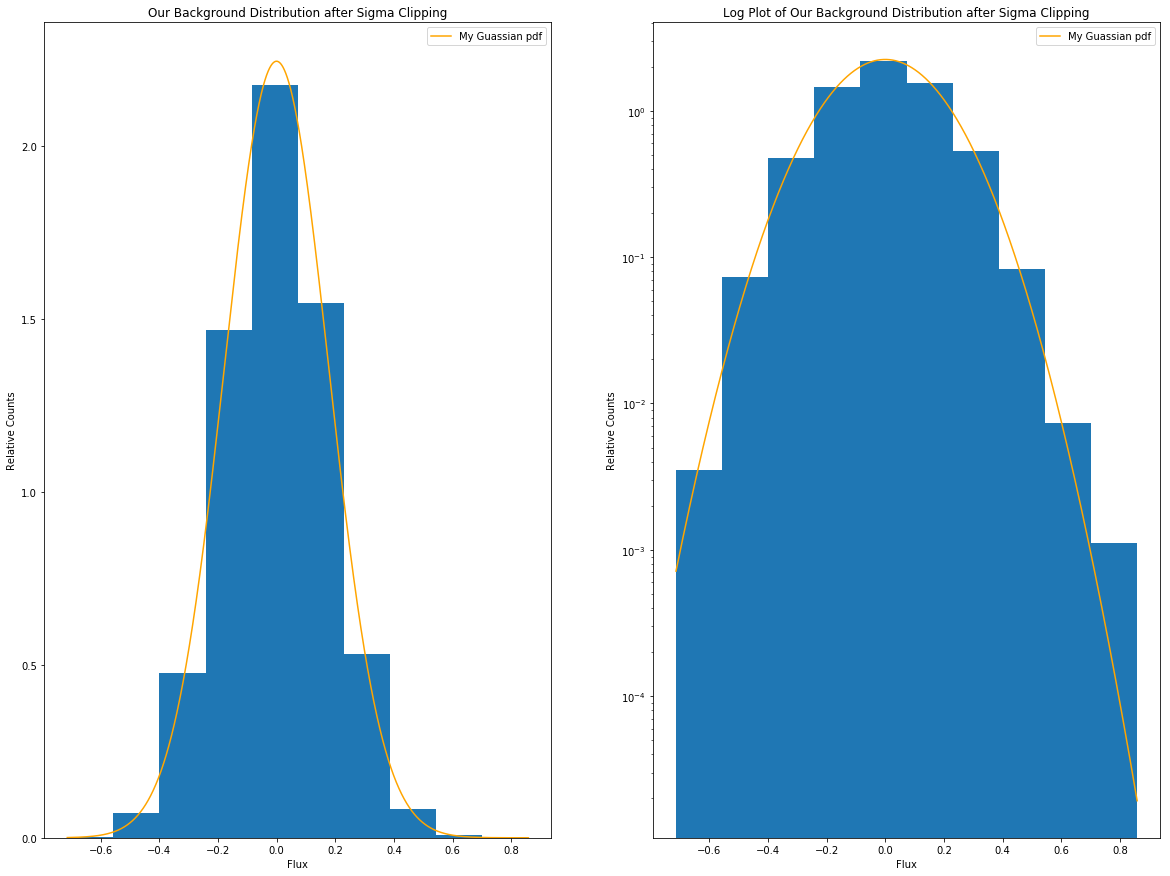

In [313]:
x=np.linspace(avgnew.min(),avgnew.max(),10000)
pdf = stats.norm.pdf(x,fit[0],fit[1])

fig,ax=plt.subplots(1,2)

ax[0].hist(avgnew,density=True)
ax[0].plot(x,pdf,color='orange',label='My Guassian pdf')
ax[0].set_title('Our Background Distribution after Sigma Clipping')
ax[0].set_ylabel('Relative Counts')
ax[0].set_xlabel('Flux')
ax[0].legend()

ax[1].hist(avgnew,density=True)
ax[1].plot(x,pdf,color='orange',label='My Guassian pdf')
ax[1].set_title('Log Plot of Our Background Distribution after Sigma Clipping')
ax[1].set_ylabel('Relative Counts')
ax[1].set_xlabel('Flux')
ax[1].set_yscale('log')
ax[1].legend();

We can see that my pdf fits extremely well with my sigma clipped background.

## 3).

I am looking for all stars including any that are faint that are also only appearing in one image. To do this (since my pdf is guassian) I will calculate the standard deviation of my PDF using scipy stats and look for any stars that have a flux value that is greater that 4 standard deviations to the right of my mean.

In [384]:
significantvalues = stats.norm.stats(fit[0],fit[1])[0] +5*np.sqrt(stats.norm.stats(fit[0],fit[1])[1])
sf = stats.norm.stats(fit[0],fit[1])[0] -5*np.sqrt(stats.norm.stats(fit[0],fit[1])[1])




Text(0.5, 1.0, 'All signals that are 5$\\sigma$ Brighter than the Background PDF Mean and only appear in one image slice')

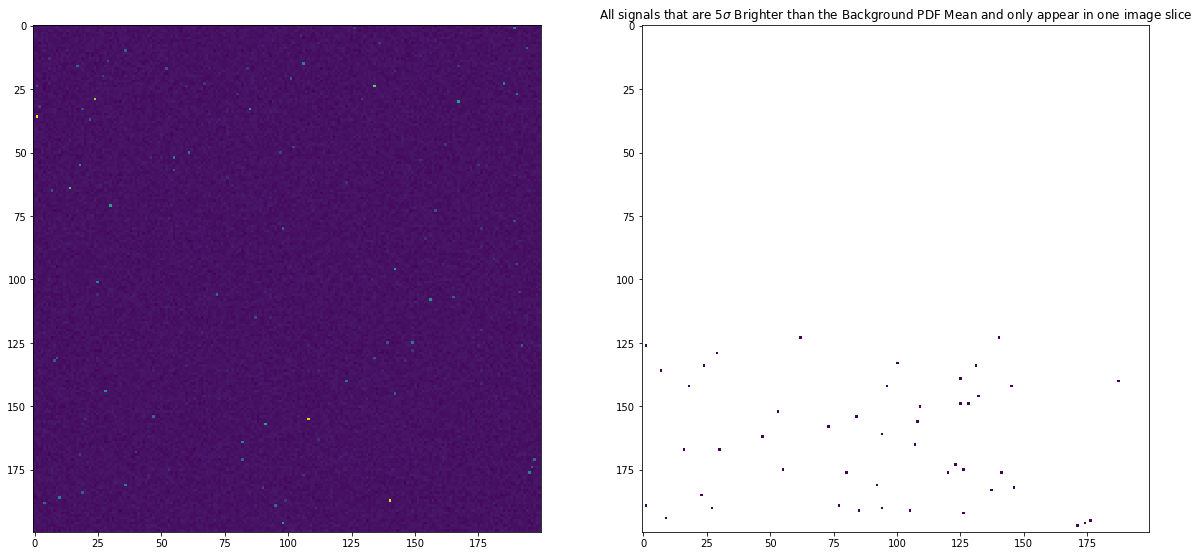

In [473]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(image1)
ax[1].set_title('Image of the sky')
for i in range(10):
    imagestack[i][np.where(imagestack[i]<=significantvalues)] = np.nan
    imagestack[i][~np.isnan(imagestack[i])] =1
    np.reshape(imagestack[i],(200,200))
finalimage = -(-imagestack[0]-imagestack[1]-imagestack[2]-imagestack[3]-imagestack[4]-imagestack[5]-imagestack[6]-imagestack[7]-imagestack[8]-imagestack[9])

finalimage[np.where(finalimage[~np.isnan(finalimage)]>1)]=np.nan
ax[1].imshow(finalimage)
ax[1].set_title(r'All signals that are 5$\sigma$ Brighter than the Background PDF Mean and only appear in one image slice')

Here I did a test where I differenced the images to find where there were any pixels that appeared in only one image as being 5 sigma signifigant to the back ground. I then set any value that was determined signifigant as a signal from my background to be equal to 1. Then I summed all the imagestack together and only plotted the points where the total value of the summed image stack was equal to 1. This means that all the pixels in the right-most graph were determined to be 5$\sigma$ signifigant from the averaged background and only appeared in one of the image stacks. Thus, this gives us our transient stars! It appears they form in a cluster together. Of course some of this may be random very bright noise that occurs from something hitting the detector and skewing the results.

## 4).

My lab partner was just looking for any signal that was a star based off our background pdf. I was looking for any significant signal based off our background pdf that also only appeared in a single image in the image stack. This is important because it is valuable to know the difference between what signals are continuous across mutliple images and what signals are unique to an image. Both end up looking for two different types of signals thus we have different backgrounds/ways we would use a background pdf.

Time: Sierra and I both spent over 20 hours in total trying to complete this lab.